# Wave Equation

Epoch 0: Loss = 1.6736e-01
Epoch 20: Loss = 7.3040e-02
Epoch 40: Loss = 6.4477e-02
Epoch 60: Loss = 5.3462e-02
Epoch 80: Loss = 4.0942e-02
Epoch 100: Loss = 3.1604e-02
Epoch 120: Loss = 2.4189e-02
Epoch 140: Loss = 1.8383e-02
Epoch 160: Loss = 1.3879e-02
Epoch 180: Loss = 1.0833e-02
Epoch 200: Loss = 8.6247e-03
Epoch 220: Loss = 7.1934e-03
Epoch 240: Loss = 5.8620e-03
Epoch 260: Loss = 5.3637e-03
Epoch 280: Loss = 4.3843e-03
Epoch 300: Loss = 4.0017e-03
Epoch 320: Loss = 3.4462e-03
Epoch 340: Loss = 3.1087e-03
Epoch 360: Loss = 3.3715e-03
Epoch 380: Loss = 2.6932e-03
Epoch 400: Loss = 2.4409e-03
Epoch 420: Loss = 2.2749e-03
Epoch 440: Loss = 2.1374e-03
Epoch 460: Loss = 2.4386e-03
Epoch 480: Loss = 1.9038e-03
Epoch 500: Loss = 1.8135e-03
Epoch 520: Loss = 1.9395e-03
Epoch 540: Loss = 1.8079e-03
Epoch 560: Loss = 1.5639e-03
Epoch 580: Loss = 1.5165e-03
Epoch 600: Loss = 1.6248e-03
Epoch 620: Loss = 1.4256e-03
Epoch 640: Loss = 1.3397e-03
Epoch 660: Loss = 1.3058e-03
Epoch 680: Loss = 1.

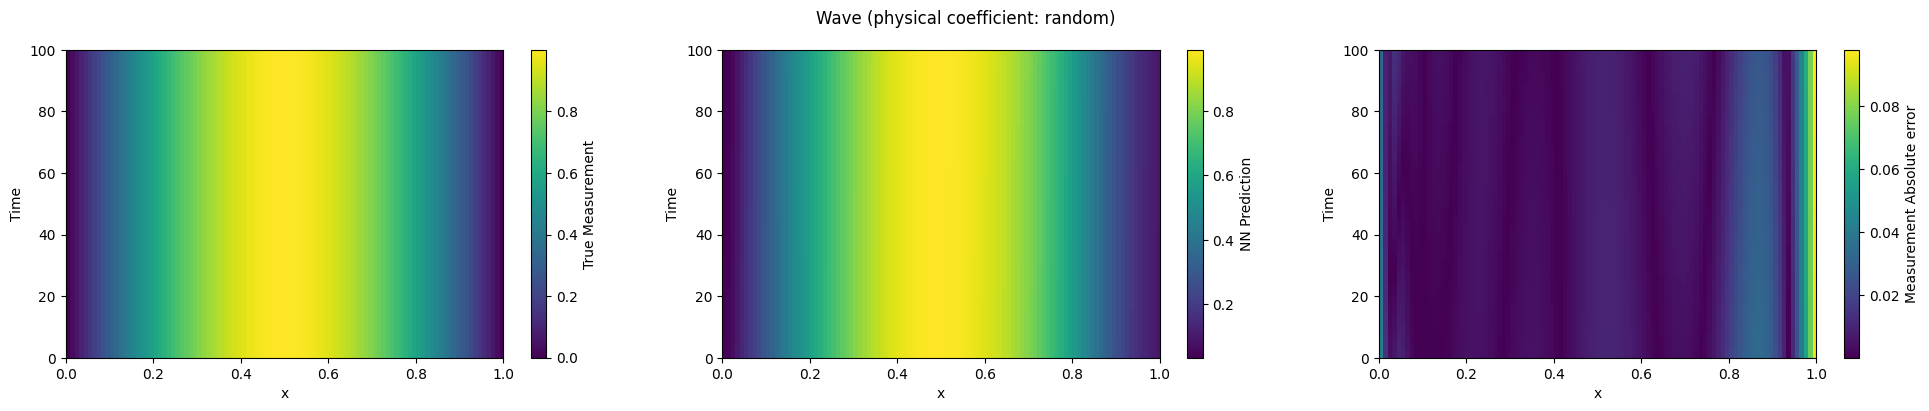

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..", "")))

import torch
from src.data_generator.wave_equations import WaveEquationDataset
from src.train.train import train
from src.figures.figures import plot_sample
from src.models.basic import alpha_network, u_network
from src.loss_function.loss_function import Loss


if __name__ == "__main__":

    # For PyTorch random
    torch.manual_seed(45)

    # Create Dataset
    dataset = WaveEquationDataset(n_samples=1, nx=100, nt=100,T=100, L=1)

    # Define PINNS
    alpha_net = alpha_network()
    u_net = u_network()

    # training
    u_net.train()
    alpha_net.train()

    lr = 1e-2
    optimizer = torch.optim.Adam(list(u_net.parameters()) + list(alpha_net.parameters()), lr=lr)
    loss = Loss()
    train(
        loss_function=loss,
        optimizer=optimizer,
        dataset=dataset,
        u_net=u_net,
        alpha_net=alpha_net
    )

    # plot
    u_net.eval()
    alpha_net.eval()
    sample = dataset[0]
    u_xt = u_net(xt=sample["xt"])
    plot_sample(sample, u_xt, xt_pred_mesh=sample)


# Diffusion Equation

Epoch 0: Loss = 1.8847e-01
Epoch 20: Loss = 8.3082e-02
Epoch 40: Loss = 7.0985e-02
Epoch 60: Loss = 6.6712e-02
Epoch 80: Loss = 6.5557e-02
Epoch 100: Loss = 6.5184e-02
Epoch 120: Loss = 6.5009e-02
Epoch 140: Loss = 6.4903e-02
Epoch 160: Loss = 6.4826e-02
Epoch 180: Loss = 6.4766e-02
Epoch 200: Loss = 6.4737e-02
Epoch 220: Loss = 6.4692e-02
Epoch 240: Loss = 6.4658e-02
Epoch 260: Loss = 6.4637e-02
Epoch 280: Loss = 6.4369e-02
Epoch 300: Loss = 6.2634e-02
Epoch 320: Loss = 5.2780e-02
Epoch 340: Loss = 3.7594e-02
Epoch 360: Loss = 2.5703e-02
Epoch 380: Loss = 1.8652e-02
Epoch 400: Loss = 1.4049e-02
Epoch 420: Loss = 1.1455e-02
Epoch 440: Loss = 1.0223e-02
Epoch 460: Loss = 8.7867e-03
Epoch 480: Loss = 8.1169e-03
Epoch 500: Loss = 7.5674e-03
Epoch 520: Loss = 7.1485e-03
Epoch 540: Loss = 6.6710e-03
Epoch 560: Loss = 5.8476e-03
Epoch 580: Loss = 5.6930e-03
Epoch 600: Loss = 4.2634e-03
Epoch 620: Loss = 3.6440e-03
Epoch 640: Loss = 3.2544e-03
Epoch 660: Loss = 3.1821e-03
Epoch 680: Loss = 3.

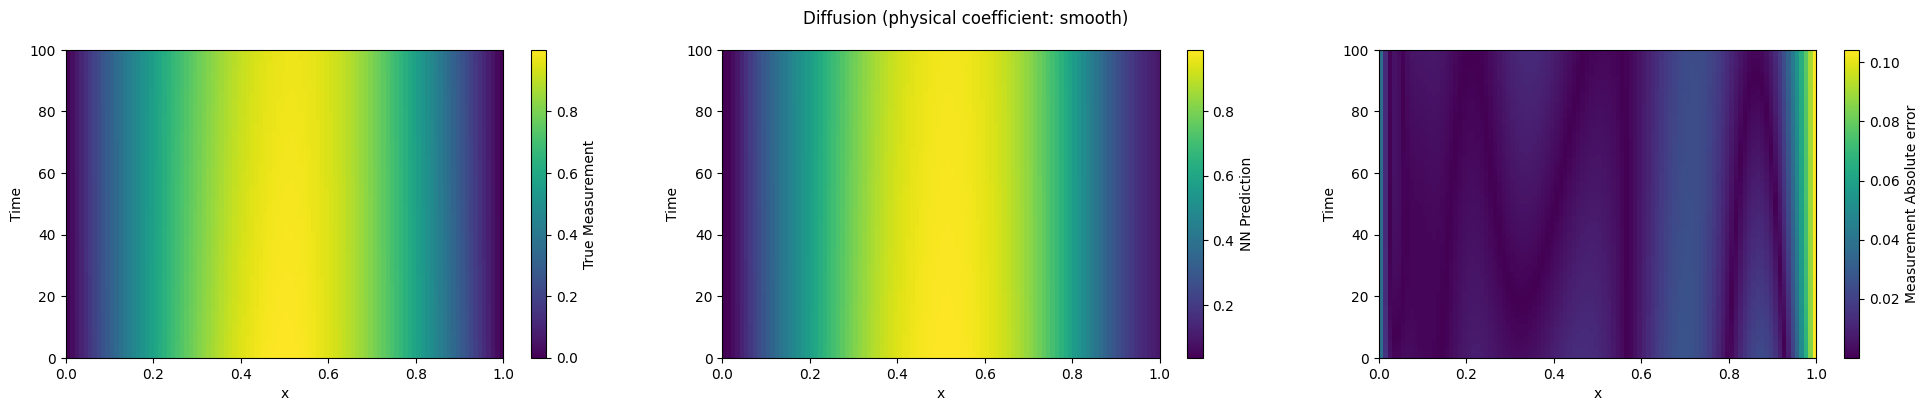

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..", "")))

import torch
from src.data_generator.diffusion_equations import DiffusionEquationDataset
from src.train.train import train
from src.figures.figures import plot_sample
from src.models.basic import alpha_network, u_network
from src.loss_function.loss_function import Loss


if __name__ == "__main__":

    # Create Dataset
    dataset = DiffusionEquationDataset(n_samples=1, nx=100, nt=100,T=100, L=1)

    # Define PINNS
    alpha_net = alpha_network()
    u_net = u_network()

    # training
    u_net.train()
    alpha_net.train()

    lr = 1e-2
    optimizer = torch.optim.Adam(list(u_net.parameters()) + list(alpha_net.parameters()), lr=lr)
    loss = Loss()
    train(
        loss_function=loss,
        optimizer=optimizer,
        dataset=dataset,
        u_net=u_net,
        alpha_net=alpha_net
    )

    # plot
    u_net.eval()
    alpha_net.eval()
    sample = dataset[0]
    u_xt = u_net(xt=sample["xt"])
    plot_sample(sample, u_xt, xt_pred_mesh=sample)
